# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [4]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [5]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

1. What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

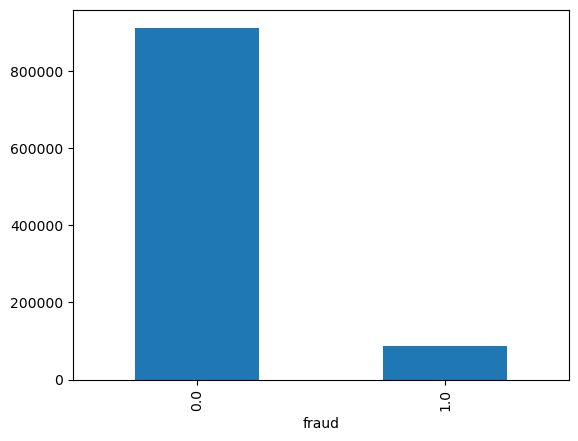

In [9]:
fraud_detected= fraud["fraud"].value_counts()
fraud_detected.plot(kind="bar")
plt.show()

Yes, we habe imbalanced dataset.

#### 2. Train a LogisticRegression.


In [12]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [63]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

#### 3.. Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [67]:
log_reg.score(X_test_scaled, y_test)

0.958852

In [69]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228150
         1.0       0.89      0.60      0.72     21850

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



### 4.Run Oversample in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?

In [18]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values

In [19]:
fraud_yes = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [20]:
len(fraud_yes),len(no_fraud)

(65478, 684522)

In [21]:
fraud_oversampled = resample(fraud_yes,
                                    replace=True,
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [22]:
fraud_oversampled.shape

(684522, 8)

In [23]:
train_over = pd.concat([fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31913,-0.370294,-0.106811,2.096980,0.367031,-0.734892,-0.334507,0.733243,1.0
498346,1.151779,-0.084746,0.045247,0.367031,-0.734892,-0.334507,0.733243,1.0
487718,-0.062938,-0.177671,6.232673,0.367031,-0.734892,-0.334507,0.733243,1.0
599272,-0.058429,-0.132920,1.157110,0.367031,-0.734892,-0.334507,0.733243,1.0
525171,-0.180319,-0.011069,0.798777,0.367031,-0.734892,-0.334507,0.733243,1.0
...,...,...,...,...,...,...,...,...
749994,-0.374123,-0.140582,-0.559543,0.367031,1.360744,-0.334507,-1.363805,0.0
749995,-0.292626,-0.092961,1.936557,0.367031,-0.734892,-0.334507,-1.363805,0.0
749997,-0.382937,-0.175531,-0.543969,-2.724569,1.360744,-0.334507,0.733243,0.0
749998,-0.219969,-0.172792,-0.356158,0.367031,-0.734892,-0.334507,0.733243,0.0


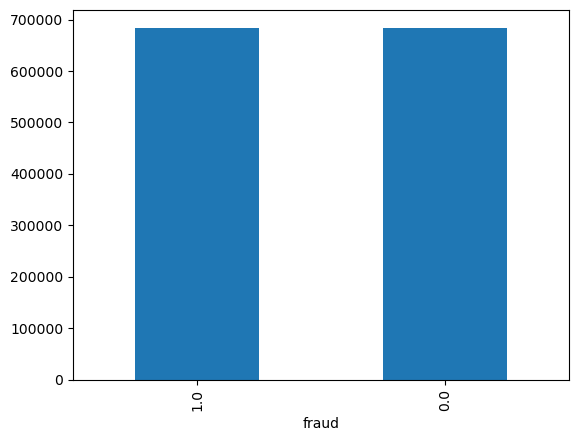

In [24]:
train_over_x= train_over["fraud"].value_counts()
train_over_x.plot(kind="bar")
plt.show()

now , we have balanced data , try to see results with this.

In [26]:
features = train_over.drop(columns = ["fraud"])
target = train_over["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

log_reg.score(X_test_scaled, y_test)

0.9407265215727179

In [27]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    171414
         1.0       0.93      0.95      0.94    170847

    accuracy                           0.94    342261
   macro avg       0.94      0.94      0.94    342261
weighted avg       0.94      0.94      0.94    342261



#### 5. Now, run Undersample in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [29]:
no_fraud_undersampled = resample(no_fraud,
                                    replace=True,
                                    n_samples = len(fraud_yes),
                                    random_state=0)


train_under = pd.concat([fraud_yes, no_fraud_undersampled])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
1,-0.364836,-0.017426,1.281519,0.367031,-0.734892,-0.334507,0.733243,1.0
9,-0.388940,-0.170267,9.040177,-2.724569,1.360744,-0.334507,0.733243,1.0
21,1.513434,-0.125385,-0.570272,0.367031,-0.734892,-0.334507,0.733243,1.0
61,-0.356871,-0.184332,1.203939,0.367031,1.360744,-0.334507,0.733243,1.0
67,-0.346633,-0.182150,1.058415,0.367031,-0.734892,-0.334507,0.733243,1.0
...,...,...,...,...,...,...,...,...
20427,-0.386548,-0.188185,-0.294006,-2.724569,-0.734892,-0.334507,-1.363805,0.0
626439,-0.364876,-0.172928,-0.562652,0.367031,-0.734892,-0.334507,0.733243,0.0
291065,-0.170522,0.081620,-0.348134,0.367031,-0.734892,-0.334507,0.733243,0.0
728514,-0.245367,-0.141455,-0.556115,0.367031,-0.734892,-0.334507,0.733243,0.0


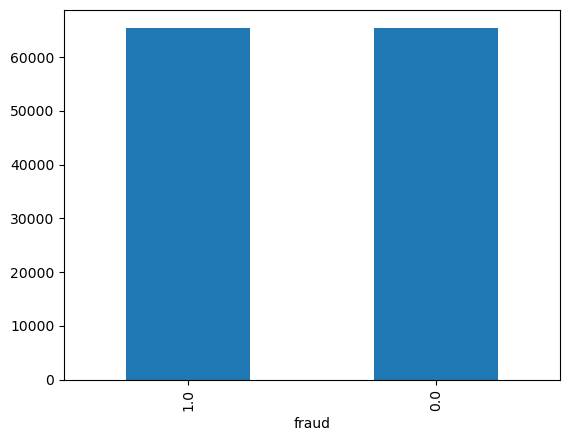

In [30]:
train_under_x= train_under["fraud"].value_counts()
train_under_x.plot(kind="bar")
plt.show()

In [31]:
features = train_under.drop(columns = ["fraud"])
target = train_under["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

log_reg.score(X_test_scaled, y_test)

0.9397660282843092

In [32]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94     16286
         1.0       0.93      0.95      0.94     16453

    accuracy                           0.94     32739
   macro avg       0.94      0.94      0.94     32739
weighted avg       0.94      0.94      0.94     32739



##### 6. Finally, run SMOTE in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [71]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [73]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [75]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228150
         1.0       0.57      0.95      0.72     21850

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

